In [ ]:
#!pip install folium
# use to install folium

In [74]:
import pandas as pd
import folium
from folium import plugins, features
import numpy as np
from load_month import TripsLoader
import branca.colormap as cm
from ipywidgets import widgets, Layout, interact
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline
figsize = (20,12)

In [75]:
loader = TripsLoader()
coords = loader.get_coords()
loc = [(coords[1] + coords[3])/2, (coords[0] + coords[2])/2]
use_reg = reg.loc[regs, :]
use_reg['lat'] = (reg.south + reg.north) / 2 
use_reg['lon'] = (reg.west + reg.east) / 2
use_reg = use_reg[['lat', 'lon']]
# загрузка координат

In [76]:
#
regs = np.loadtxt('data/regs.txt', delimiter=',', dtype=np.int)
l_parse_dates = [u'tpep_pickup_datetime']
l_index_col = ['tpep_pickup_datetime']
# 
df = pd.read_csv('data/input.csv', sep=';', parse_dates=l_parse_dates, index_col=l_index_col)
preds = []
for i in range(1, 7):
    preds.append(pd.read_csv('data/pred%d.csv'%i, sep=';', parse_dates=l_parse_dates, index_col=l_index_col))
reg = pd.read_csv('regions.csv', sep=';', index_col=['region'])
use_reg = reg.loc[regs, :]
use_reg['lat'] = (reg.south + reg.north) / 2 
use_reg['lon'] = (reg.west + reg.east) / 2
use_reg = use_reg[['lat', 'lon']]

In [77]:
dates = np.unique(df.index.date)

def plot(region, start, end, pred_i):
    region = str(region)
    df[region][start:end].plot(color = 'r', figsize=figsize, label='Real')
    preds[pred_i][region][start:end].plot(color = 'b', figsize=figsize, label='Preds')
    plt.legend()
    plt.xlabel('Дата')
    plt.show()

## Просмотр графиков реального и прогнозируемого спроса за период

Box(children=(Dropdown(description='Hours+', layout=Layout(height='30px', width='10%'), options=(1, 2, 3, 4, 5…

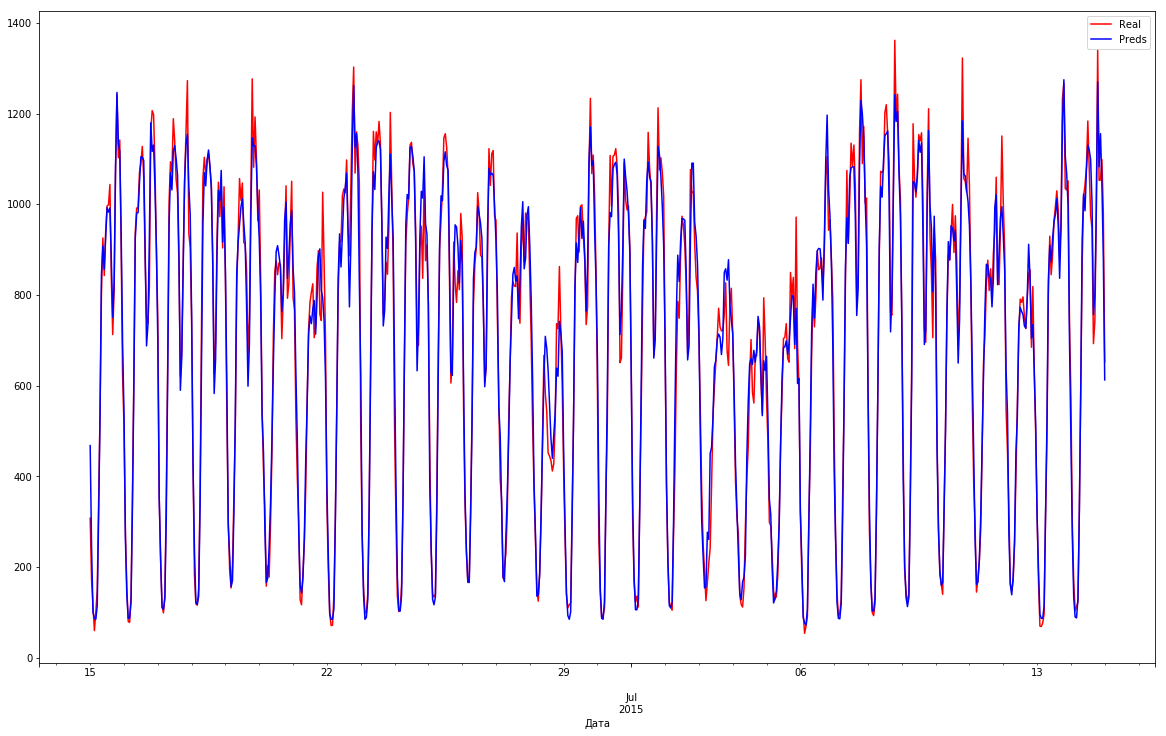

In [78]:
style = {'description_width': 'initial'}
pred_sel = widgets.Dropdown(
    options=range(1,7),
    value = 1,
    disabled=False,
    description="Hours+",
    layout = Layout(width='10%', height='30px'),
    style=style
)
reg_sel = widgets.Dropdown(
    options=regs,
    value = 1231,
    disabled=False,
    description="Region",
    layout = Layout(width='10%', height='30px'),
    style=style
)
date_sel = widgets.SelectionRangeSlider(
    options=dates,
    index=(0,30),
    description='Date',
    disabled=False,
    layout = Layout(width='70%', height='30px'),
    style=style
)
def plot_on_click(b):
    clear_output()
    display(box)
    plot(reg_sel.value, date_sel.value[0], date_sel.value[1], pred_sel.value-1)
    

button = widgets.Button(description='Plot!',
    disabled=False,
    layout = Layout(width='10%', height='30px'))

button.on_click(plot_on_click)
items = [pred_sel, reg_sel, date_sel, button]
box = widgets.Box(items)
box

In [79]:
def ny_map():
    folium_map = folium.Map(location=loc,
                        zoom_start=11,
                        tiles="CartoDB dark_matter")
    return folium_map

In [110]:
from datetime import datetime, time
def plot_hour_map(date, hour):
    dt = datetime.combine(date, time(hour))
    if dt not in df.index:
        return "Wrong datetime"
    folium_map = ny_map()
    data = reg.loc[regs, :].copy()
    trips = df.loc[dt, :].values
    data['trips'] = trips
    data['color'] = np.log(data.trips+1)
    data.head()

    linear = cm.LinearColormap(
        ['green', 'yellow', 'red'],
        vmin=0, vmax=data.color.max()
    )
    for ind, row in data.iterrows():
        color = linear(row.color)
        popup_text = "Region number:{}<br> Trips from this area: {}"
        popup_text = popup_text.format(ind, int(row.trips))
        features.RectangleMarker(bounds=(row.north, row.west,
                                         row.south, row.east),
                                 popup=popup_text,
                                 fill_opacity=0.25,
                                 fill_color = color,
                                 color = 'black',
                                ).add_to(folium_map)

    return folium_map

## Просмотр реального спроса на карте

In [109]:
style = {'description_width': 'initial'}
date_sel = widgets.DatePicker(
    description='Pick a Date',
    value=dates[0],
    disabled=False,
    options=dates,
    layout = Layout(width='30%', height='30px'),
)
time_sel = widgets.SelectionSlider(
    options=range(24),
    value=0,
    description='Time',
    disabled=False,
    layout = Layout(width='60%', height='30px'),
    style=style
)
def plot_on_click(b):
    clear_output()
    display(box)
    display(plot_hour_map(date_sel.value, time_sel.value))
    
button = widgets.Button(description='Plot!',
    disabled=False,
    layout = Layout(width='10%', height='30px'))

button.on_click(plot_on_click)
items = [date_sel, time_sel, button]
box = widgets.Box(items)
box

Box(children=(DatePicker(value=datetime.date(2015, 7, 15), description='Pick a Date', layout=Layout(height='30…